### https://github.com/keras-team/keras/blob/master/examples/cifar10_resnet.py
### https://github.com/raghakot/keras-resnet/blob/master/resnet.py
### https://keras.io/applications/#resnet50

In [3]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.utils.io_utils import HDF5Matrix
from keras.applications.imagenet_utils import preprocess_input
base_path = os.path.join('data')
train_path = os.path.join(base_path, 'food_c101_n10099_r64x64x3.h5')
test_path = os.path.join(base_path, 'food_test_c101_n1000_r64x64x3.h5')


### the base path means, the ''data' file folder is placed at the same level of the notebook.
### the dataset is placed in the "data" file

In [4]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

In [5]:
X_train = HDF5Matrix(train_path, 'images_')[:]
y_train = HDF5Matrix(train_path, 'category_copy')[:]
test1 =HDF5Matrix(train_path,'category_names')
#test2 =HDF5Matrix(train_path,'subgroup')
print(X_train.shape)
print(X_train[0].min())
print(X_train[0].max())
print(y_train.shape)
print(test1.shape)
#print(len(test2))
print(test1[0],test1[1],test1[2])
#######################################
X_test = HDF5Matrix(test_path, 'images_')[:]
y_test = HDF5Matrix(test_path, 'category_')[:]
print(X_test.shape)
print(y_test.shape)
#print(len(y_test["category"]))

(1001, 64, 64, 3)
0
242
(1001, 101)
(101,)
b'apple_pie' b'baby_back_ribs' b'baklava'
(100, 64, 64, 3)
(100, 101)


In [6]:
# Training parameters
batch_size = 32  # orig paper trained all networks with batch_size=128
epochs = 200
data_augmentation = True
num_classes = 10

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True

# define the version and n value
n=3
version=1


In [7]:
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

In [8]:
# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)


In [9]:
# reshape Input image dimensions.
input_shape = X_train.shape[1:]

In [10]:
# Normalize data.
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [11]:
# x_train and x_ test get the substract value between the mean and themselves
if subtract_pixel_mean:
    X_train_mean = np.mean(X_train, axis=0)
    X_train -= X_train_mean
    X_test -= X_train_mean

In [12]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

x_train shape: (1001, 64, 64, 3)
1001 train samples
100 test samples
y_train shape: (1001, 101)


In [13]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# use the ResNet50 model in Keras core
 my new model includes the ResNet50 inside
https://www.kaggle.com/ociule/resnet50-e2-data-aug-horse-donkey

In [45]:
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten, Dropout
%time
from keras import Sequential
from tensorflow.python.keras.applications import ResNet50

new_model = Sequential()
#new_model = new_model.add(Conv2D(32, (3, 3), padding='same',
 #                input_shape=X_train.shape[1:]))

resnet_model = ResNet50(include_top=False, pooling='avg', weights='imagenet',classes=100)
#new_model = new_model.add(resnet_model)
#The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded


#new_model.add(Dense(64, activation='relu'))
#new_model.add(Dropout(0.25))
#new_model.add(Dense(16, activation='relu'))
#new_model.add(Dropout(0.25))

#new_model.add(Dense(num_classes, activation='softmax'))

# (ResNet) model is already trained.
#new_model.layers[0].trainable = False
#new_model.summary()
resnet_model.summary()



Wall time: 0 ns
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        input_3[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_99 (Activation)      (None, None, None, 6 0           bn_conv1[0][0]                   
_____________________________________________________________________________________________

res4a_branch2c (Conv2D)         (None, None, None, 1 263168      activation_122[0][0]             
__________________________________________________________________________________________________
res4a_branch1 (Conv2D)          (None, None, None, 1 525312      activation_120[0][0]             
__________________________________________________________________________________________________
bn4a_branch2c (BatchNormalizati (None, None, None, 1 4096        res4a_branch2c[0][0]             
__________________________________________________________________________________________________
bn4a_branch1 (BatchNormalizatio (None, None, None, 1 4096        res4a_branch1[0][0]              
__________________________________________________________________________________________________
add_40 (Add)                    (None, None, None, 1 0           bn4a_branch2c[0][0]              
                                                                 bn4a_branch1[0][0]               
__________

add_46 (Add)                    (None, None, None, 2 0           bn5a_branch2c[0][0]              
                                                                 bn5a_branch1[0][0]               
__________________________________________________________________________________________________
activation_141 (Activation)     (None, None, None, 2 0           add_46[0][0]                     
__________________________________________________________________________________________________
res5b_branch2a (Conv2D)         (None, None, None, 5 1049088     activation_141[0][0]             
__________________________________________________________________________________________________
bn5b_branch2a (BatchNormalizati (None, None, None, 5 2048        res5b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_142 (Activation)     (None, None, None, 5 0           bn5b_branch2a[0][0]              
__________

## use the weight file trained by the imagnet, because we can add other layers with the resnet, the added layer mumt be an instance of class layer.

In [17]:
preds = resnet_model.predict(X_test)    

In [43]:
print(preds)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


## data augmentation

In [24]:
# compile the model
resnet_model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy']) 

In [26]:
# fit the model
fit_model = resnet_model.fit_generator(
                                train_generator,
                                epochs=30,
                                validation_data=validation_generator,
                                validation_steps=200/32,
verbose=0)

In [20]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 32
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

# train data path, to load the data
train_generator = data_generator.flow_from_directory(
        './data/food32_32_1_train',
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical')

# validation data path, to load the data
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = data_generator.flow_from_directory(
        './data/food32_32_1_test',
        target_size=(image_size, image_size),
        class_mode='categorical')

hist = resnet_model.fit_generator(
        train_generator,
    
       # steps_per_epoch=3,
        epochs=2,
        verbose=0,
        validation_data=validation_generator,
        validation_steps=40/32)


# AttributeError: 'ProgbarLogger' object has no attribute 'log_values', to set verbose =1, and step_per_epoch!=0
# it takes a long time to run the fid_generator 

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


### use the ImageDataGenerator in tensorflow to process the train data and the test data before using them


## use the model to predict the label for the food images


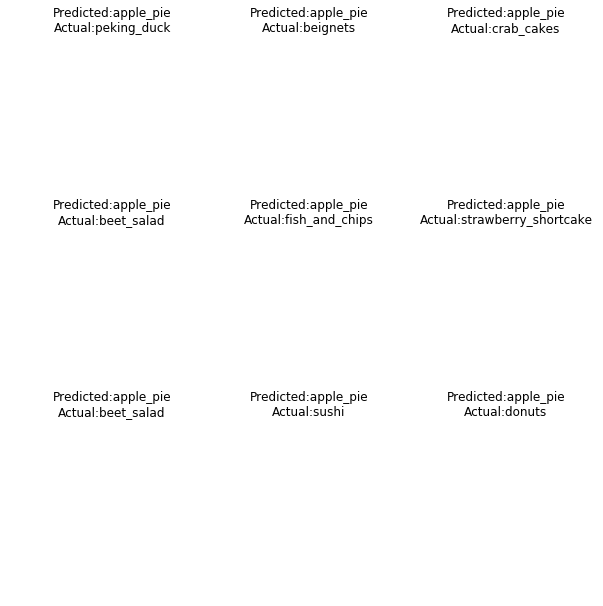

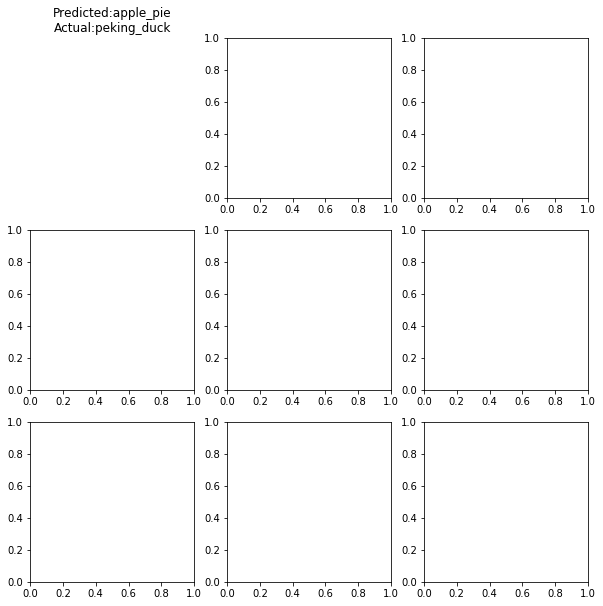

In [42]:
sample_imgs = 100
with h5py.File(test_path, 'r') as n_file:
    total_imgs = n_file['images'].shape[0]
    read_idxs = slice(4,sample_imgs)
    im_data = n_file['images_'][read_idxs]
    im_label = n_file['category_'].value[read_idxs]
    label_names = [x.decode() for x in n_file['category_names'].value]
    
    
pred_label = resnet_model.predict(im_data)


fig, m_ax = plt.subplots(3, 3, figsize = (10, 10))

for c_ax, c_label, c_pred, c_img in zip(m_ax.flatten(), im_label, pred_label, im_data):
    #c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
    c_ax.axis('off')
    c_ax.set_title('Predicted:{}\nActual:{}'.format(label_names[np.argmax(c_pred)],
                                                  label_names[np.argmax(c_label)]))
    plt.show()

### The model predict all the food as apple pie, the predict label is the np.argmax means the max value in this array. the apple pie got the max value in the model.predict(test image data).